# Logistic Regression

problem statement :

Build a machine learning model to predict user will click the ad or not based on his experience and estimated salary for a given dataset.
https://drive.google.com/open?id=1I8KsCufEa47XvzrkxhntEWSy1Su0E0NY


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/')
from ipynb.fs.full.my_custom_library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/Social_Network_Ads.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


##### data - pre processing

In [2]:
# looking at data set
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# looking at variation of target variable based on <<  Gender  >>  column
data_set.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


In [4]:
# looking at variation of target variable based on <<  Age  >>  column
data_set.groupby('Age').mean()

,User ID,EstimatedSalary,Purchased
Age,,,
18,1.567696e+07,66400.000000,0.000000
19,1.571065e+07,46000.000000,0.000000
20,1.569884e+07,61714.285714,0.000000
21,1.565027e+07,61000.000000,0.000000
22,1.568825e+07,48800.000000,0.000000
23,1.564283e+07,51166.666667,0.000000
24,1.569152e+07,49111.111111,0.000000
25,1.568253e+07,65166.666667,0.000000
26,1.571145e+07,53500.000000,0.000000


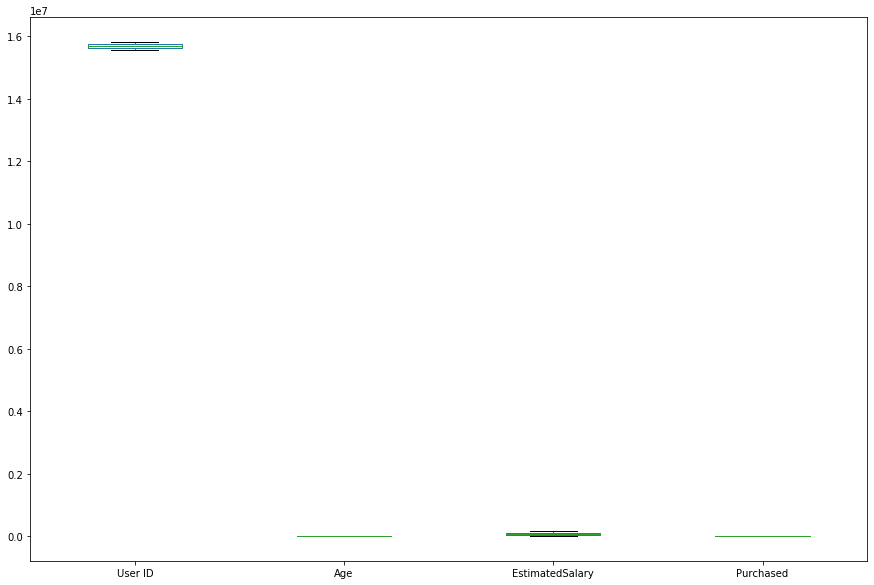

In [5]:
#looking at outliers of all columns
data_set.boxplot(grid=False, figsize=(15,10))

In [6]:
# looking at data variations in data set
data_set.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# obtaining x and y values after preprocessing the data
x_values , y_values = pre_processing_ad(data_set)

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

In [9]:
#exporting classifier object after fitting data 
joblib.dump(sc_x,'/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/scalar.pkl')

['/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/scalar.pkl']

In [10]:
#obtaining splitted training and test data set
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_values,y_values,test_size=0.2,random_state=0)

In [11]:
# obtaining classifier object after fitting the train data into it from
# a general method kept in my custom library file
classifier = fit_or_predict(train_X,train_Y,LogisticRegression(),1)

/home/admin3/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#exporting classifier object after fitting data 
joblib.dump(classifier,'/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/logical_classifier_ad.pkl')

['/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/logical_classifier_ad.pkl']

##### predicting outputs  

In [13]:
# predicting values of test data set and storing
test_prediction = fit_or_predict(test_X,test_Y,classifier)

# predicting values of train data set and storing
train_prediction = fit_or_predict(train_X,train_Y,classifier)

##### calculating accuracy and score 

In [14]:
# checking confusion matrix  to see how many values are predicted correct and incorrect
matrix_result = confusion_matrix(test_prediction,test_Y)

In [15]:
# printing the confusion matrix obtained
matrix_result

array([[57,  5],
       [ 1, 17]])

In [16]:
# calculating and printing accuracy score
score = accuracy_score(test_Y,test_prediction)
print("accuracy percentage  : ",score*100)

accuracy percentage  :  92.5


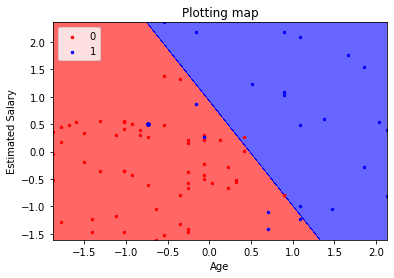

In [17]:
# plotting -- colormap
plot_colormap(test_X,test_Y,"Plotting map",classifier,ListedColormap(('red', 'blue')))